In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('cs-training.csv')
train.pop('Unnamed: 0')

0              1
1              2
2              3
3              4
4              5
           ...  
149995    149996
149996    149997
149997    149998
149998    149999
149999    150000
Name: Unnamed: 0, Length: 150000, dtype: int64

In [3]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
train.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### So we can see that *MonthlyIncome* and *NumberOfDependents* have some missed values.

In [78]:
train.corr(method='spearman').style.background_gradient(cmap='seismic')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1,0.240378,-0.117034,0.257411,0.0205968,-0.0669798,-0.0385869,0.342349,-0.0341184,0.277111,0.0459722
RevolvingUtilizationOfUnsecuredLines,0.240378,1,-0.27834,0.234372,0.0765636,-0.0782059,-0.0866038,0.23767,-0.0273058,0.187585,0.117697
age,-0.117034,-0.27834,1,-0.0946475,0.0293825,0.134614,0.158061,-0.104049,0.0542181,-0.0854012,-0.227927
NumberOfTime30-59DaysPastDueNotWorse,0.257411,0.234372,-0.0946475,1,0.038122,-0.0146117,0.0639874,0.252729,0.0222565,0.279807,0.070994
DebtRatio,0.0205968,0.0765636,0.0293825,0.038122,1,-0.130932,0.226762,-0.0319665,0.400239,0.00125697,-0.0376211
MonthlyIncome,-0.0669798,-0.0782059,0.134614,-0.0146117,-0.130932,1,0.311969,-0.0883789,0.391132,-0.0531652,0.204461
NumberOfOpenCreditLinesAndLoans,-0.0385869,-0.0866038,0.158061,0.0639874,0.226762,0.311969,1,-0.134575,0.472817,-0.0480235,0.0998406
NumberOfTimes90DaysLate,0.342349,0.23767,-0.104049,0.252729,-0.0319665,-0.0883789,-0.134575,1,-0.101472,0.320972,0.0302061
NumberRealEstateLoansOrLines,-0.0341184,-0.0273058,0.0542181,0.0222565,0.400239,0.391132,0.472817,-0.101472,1,-0.0443907,0.166122
NumberOfTime60-89DaysPastDueNotWorse,0.277111,0.187585,-0.0854012,0.279807,0.00125697,-0.0531652,-0.0480235,0.320972,-0.0443907,1,0.0352851


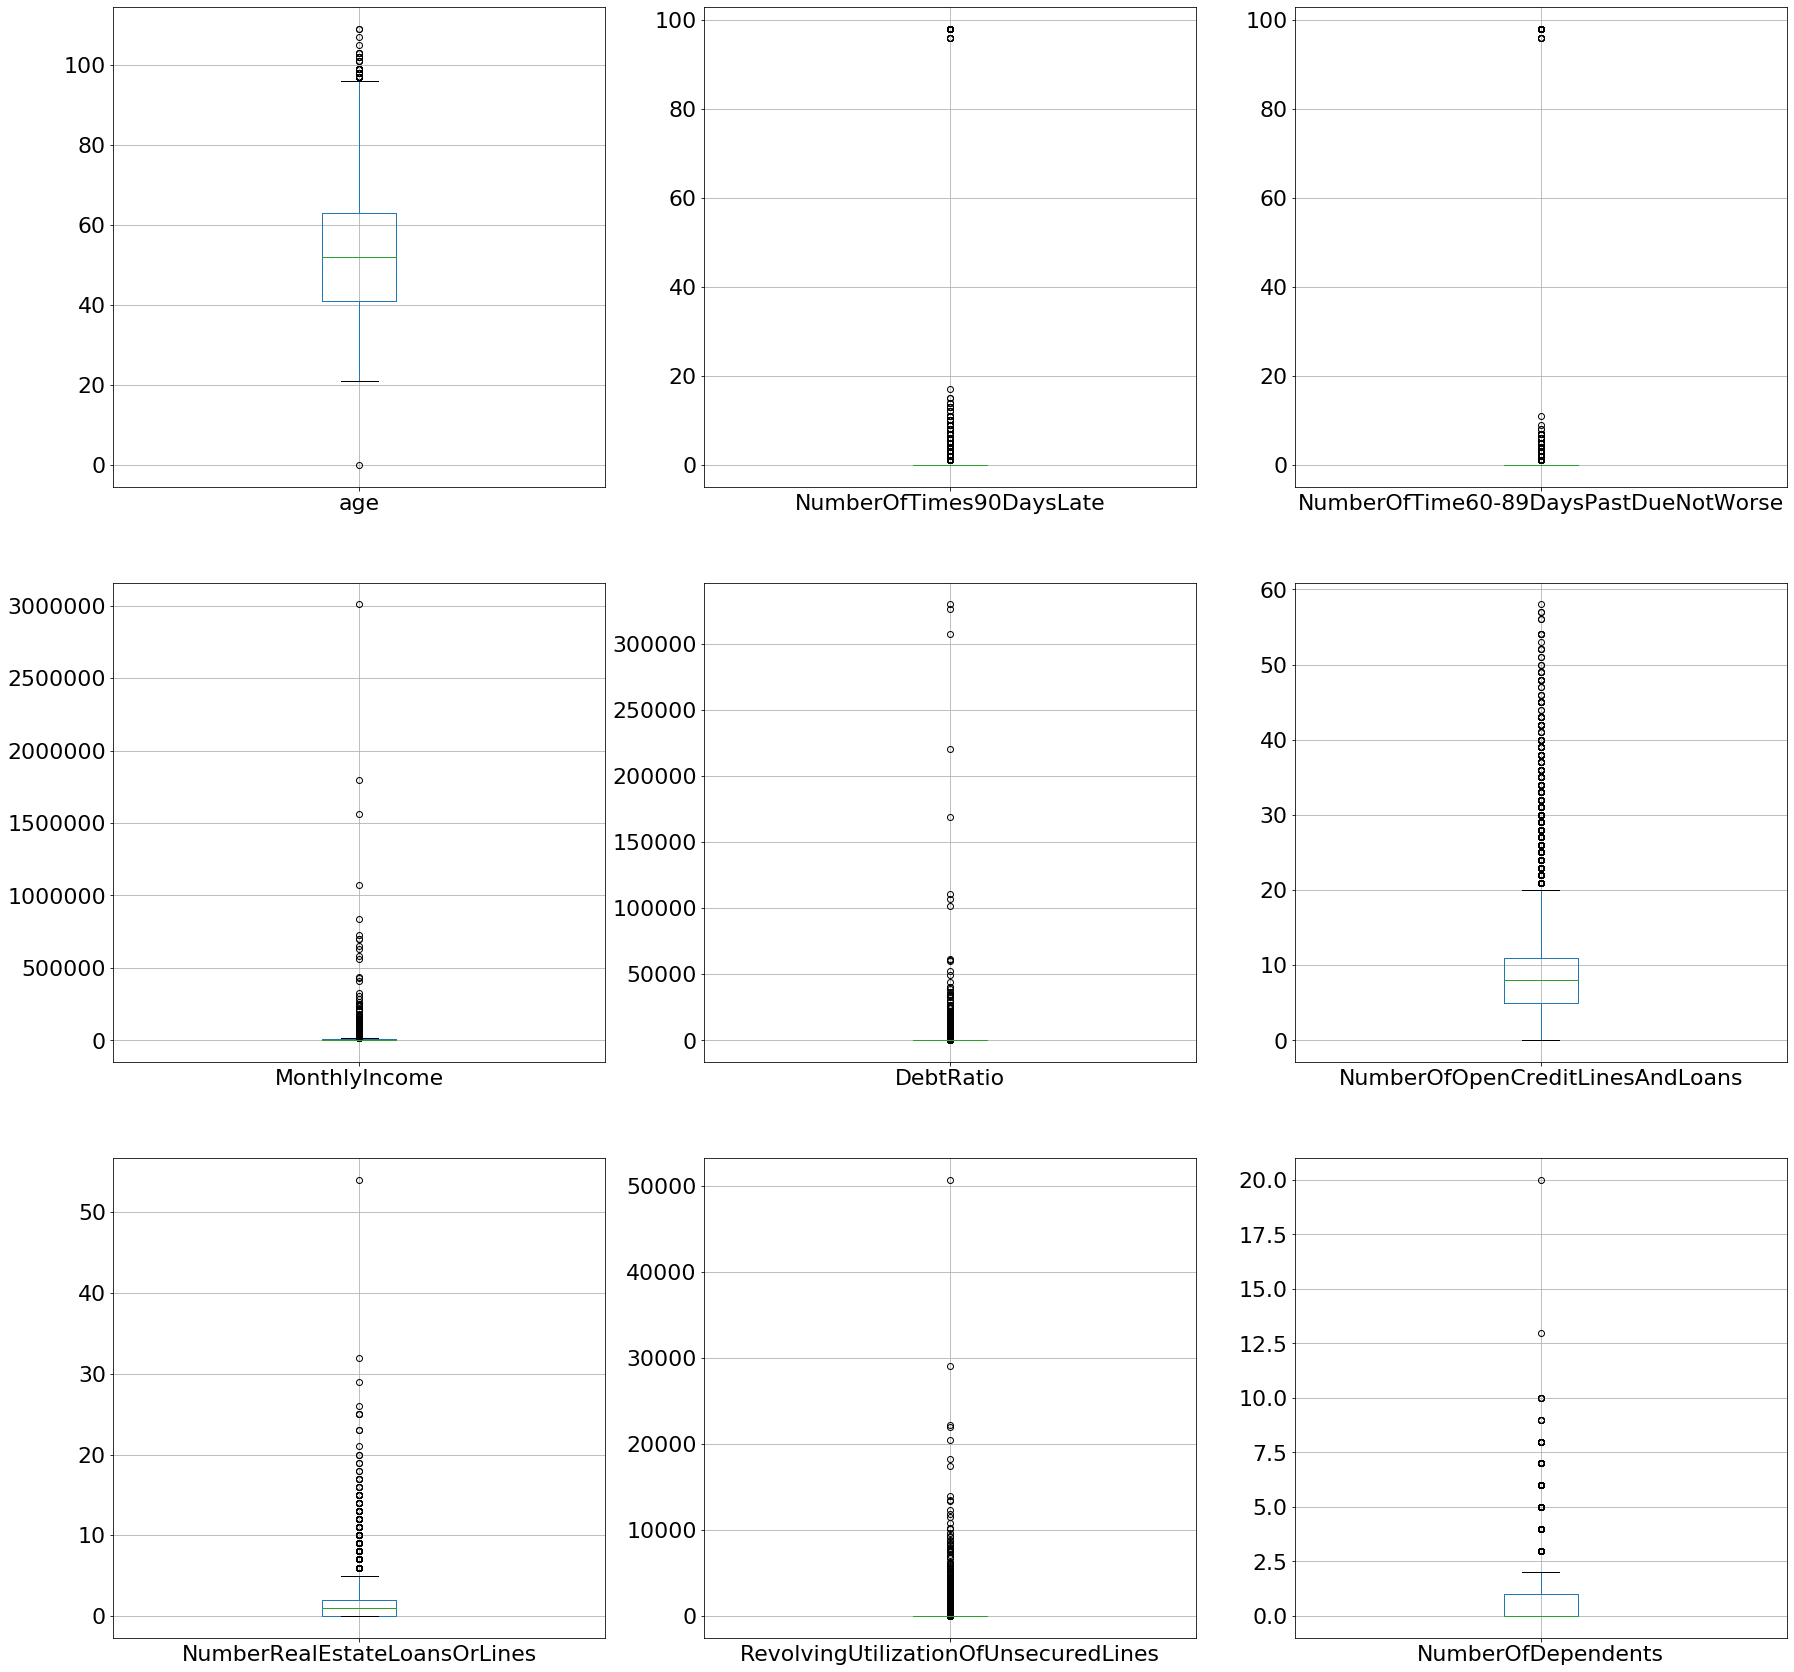

In [79]:
plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(3, 3, figsize=(30,30))
for data, ax in zip(train[['age', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents']], axes.flat):
    train.boxplot(data, ax=ax)

## Lets check SeriousDlqin2yrs variable

In [80]:
train.loc[train.SeriousDlqin2yrs==1].count()

SeriousDlqin2yrs                        10026
RevolvingUtilizationOfUnsecuredLines    10026
age                                     10026
NumberOfTime30-59DaysPastDueNotWorse    10026
DebtRatio                               10026
MonthlyIncome                            8357
NumberOfOpenCreditLinesAndLoans         10026
NumberOfTimes90DaysLate                 10026
NumberRealEstateLoansOrLines            10026
NumberOfTime60-89DaysPastDueNotWorse    10026
NumberOfDependents                       9847
dtype: int64

In [81]:
train.loc[train.SeriousDlqin2yrs==0].count()

SeriousDlqin2yrs                        139974
RevolvingUtilizationOfUnsecuredLines    139974
age                                     139974
NumberOfTime30-59DaysPastDueNotWorse    139974
DebtRatio                               139974
MonthlyIncome                           111912
NumberOfOpenCreditLinesAndLoans         139974
NumberOfTimes90DaysLate                 139974
NumberRealEstateLoansOrLines            139974
NumberOfTime60-89DaysPastDueNotWorse    139974
NumberOfDependents                      136229
dtype: int64

In [82]:
train.DebtRatio.quantile(0.975)

3489.024999999994

In [83]:
train[train['DebtRatio'] > 3489.025][['DebtRatio','MonthlyIncome']].describe()

,DebtRatio,MonthlyIncome
count,3750.000000,185.000000
mean,5917.488000,0.064865
std,10925.524011,0.246956
min,3490.000000,0.000000
25%,3957.250000,0.000000
50%,4619.000000,0.000000
75%,5789.500000,0.000000
max,329664.000000,1.000000


In [84]:
train[(train['DebtRatio'] > 3489.025) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome'])].shape[0]

164

In [85]:
train.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [86]:
train.groupby('NumberOfTime60-89DaysPastDueNotWorse')['NumberOfTime60-89DaysPastDueNotWorse'].count()

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [87]:
train.groupby('NumberOfTime30-59DaysPastDueNotWorse')['NumberOfTime30-59DaysPastDueNotWorse'].count()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

### So there are 264 people who have a lot of days late

In [88]:
train[train['RevolvingUtilizationOfUnsecuredLines'] > 10].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,173.00000,241.000000,241.000000,241.000000,241.000000,228.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,8467.67052,5.763485,0.074689,1.186722,0.087137,0.688596
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,6564.06825,3.114160,0.579711,1.065750,0.559651,1.038659
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,4500.00000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,7000.00000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,10091.00000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.00000,21.000000,8.000000,9.000000,7.000000,4.000000


In [89]:
removed_debt_outliers = train.drop(train[train['DebtRatio'] > 3489.025].index)
removed_debt_outliers = removed_debt_outliers.fillna(removed_debt_outliers.median())

In [90]:
removed_ruul = removed_debt_outliers.drop(removed_debt_outliers[removed_debt_outliers['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

In [91]:
prepared = removed_ruul.copy()
prepared.loc[prepared['NumberOfTime30-59DaysPastDueNotWorse'] > 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 18
prepared.loc[prepared['NumberOfTime60-89DaysPastDueNotWorse'] > 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 18
prepared.loc[prepared['NumberOfTimes90DaysLate'] > 90, 'NumberOfTimes90DaysLate'] = 18

In [92]:
prepared.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146021.000000,146021.000000,146021.000000,146021.000000,146021.000000,1.460210e+05,146021.000000,146021.000000,146021.000000,146021.000000,146021.000000
mean,0.066901,0.322247,52.257059,0.277214,210.204957,6.449414e+03,8.378035,0.124414,0.984886,0.098095,0.742879
std,0.249852,0.367259,14.862451,1.030522,620.319606,1.305969e+04,5.116762,0.909321,1.099282,0.836901,1.108624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029462,41.000000,0.000000,0.169799,3.833000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.151559,52.000000,0.000000,0.355966,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555345,63.000000,0.000000,0.757453,7.500000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,8.851852,109.000000,18.000000,3489.000000,3.008750e+06,58.000000,18.000000,54.000000,18.000000,20.000000


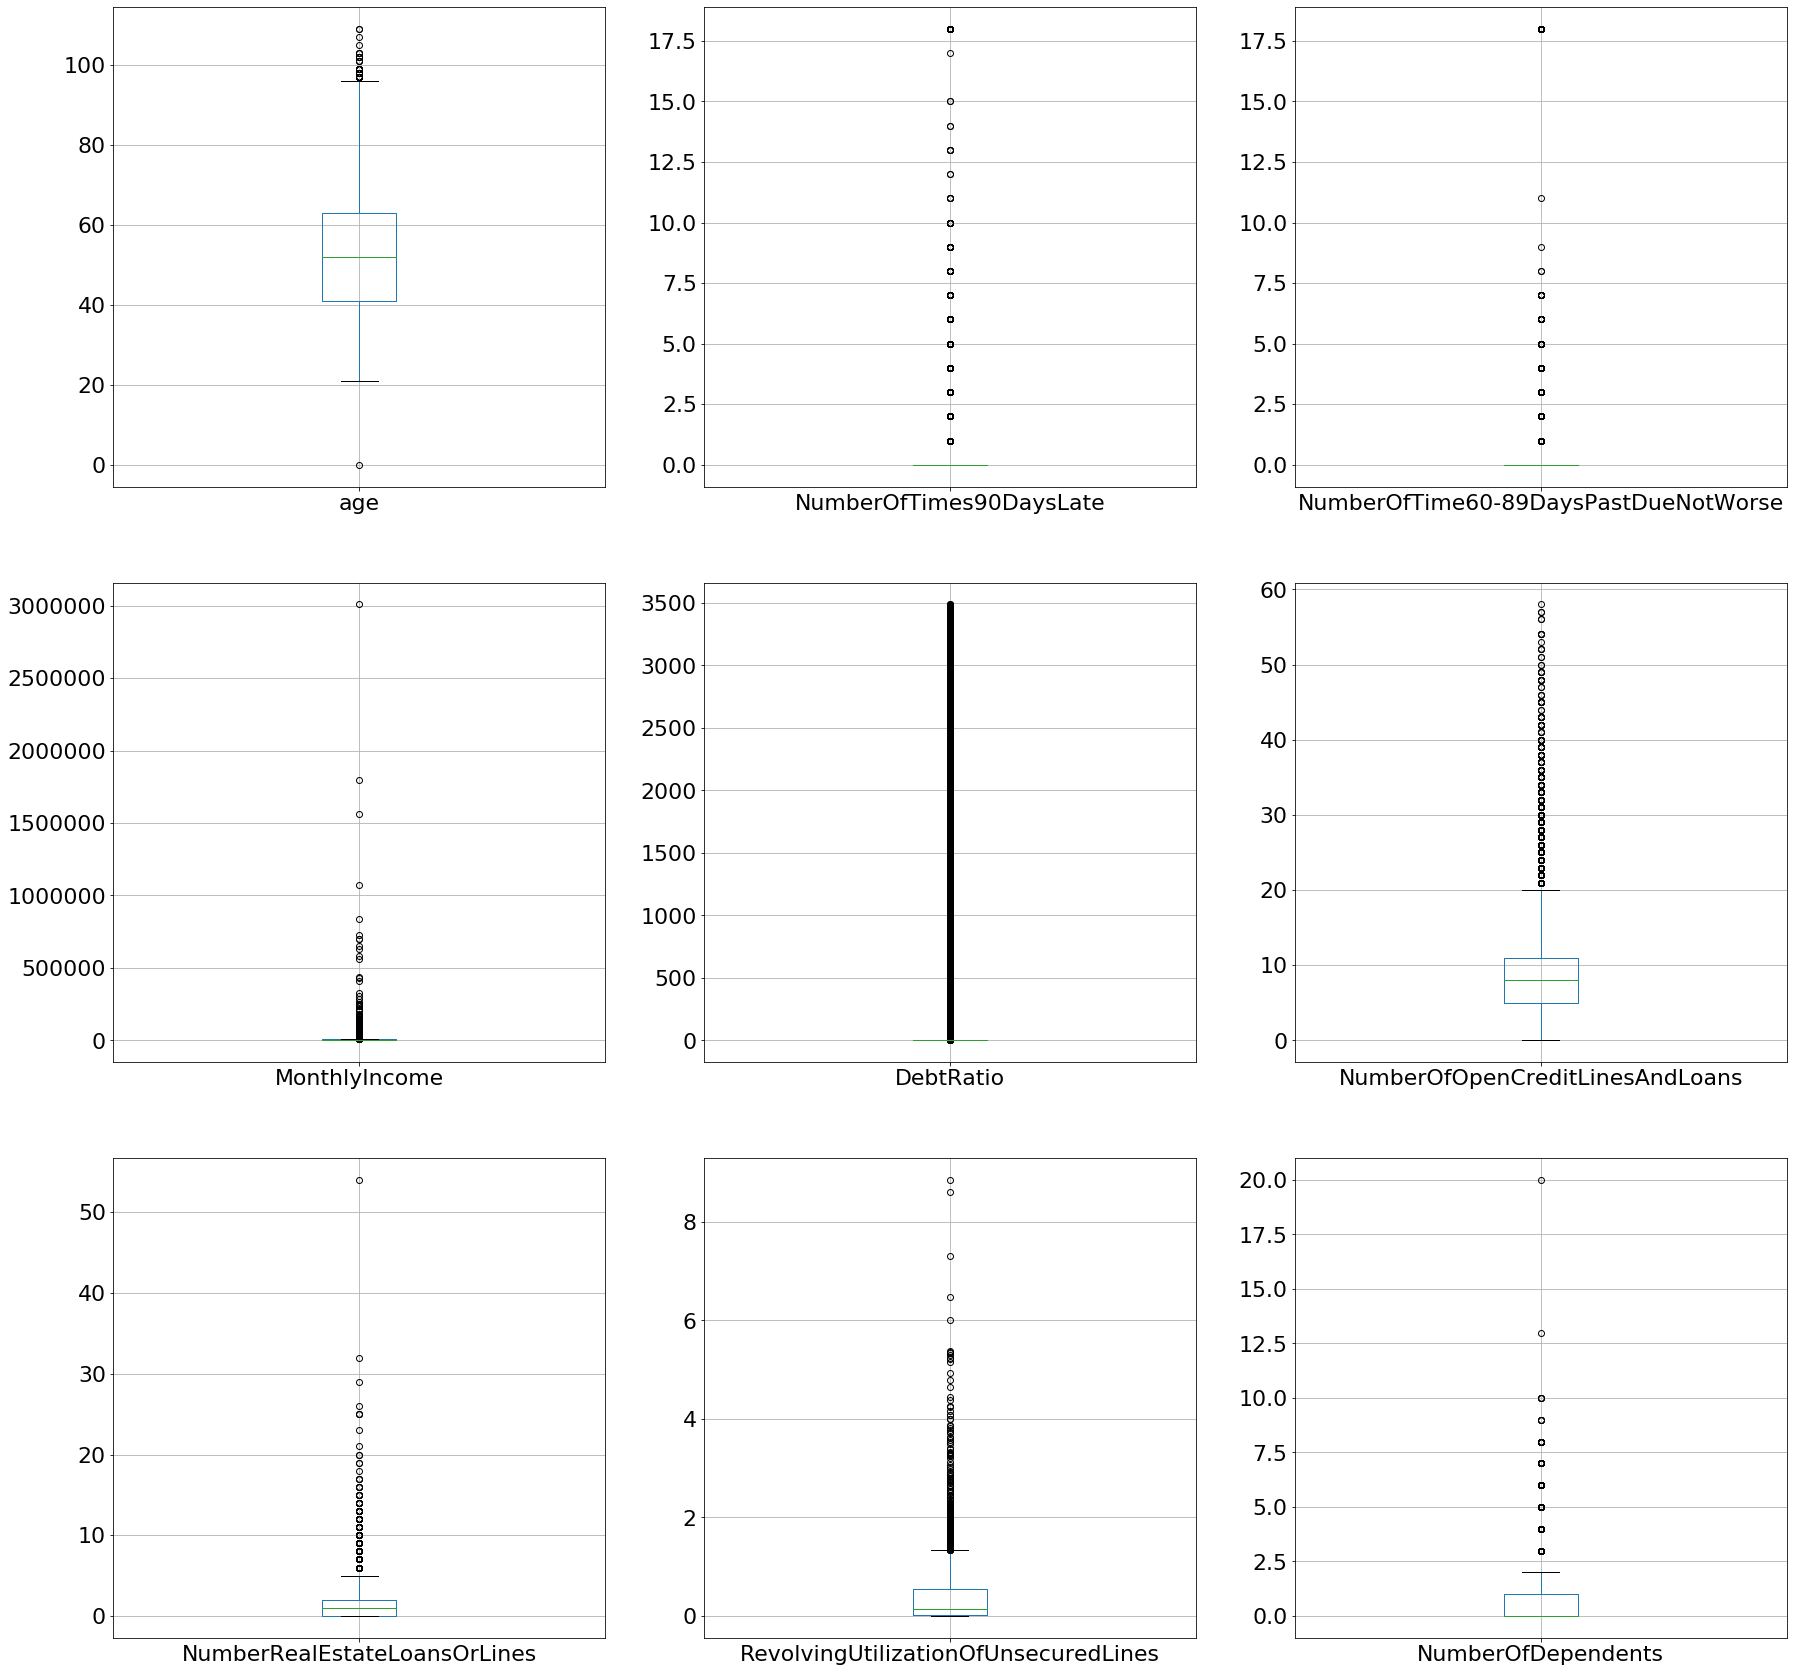

In [93]:
plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(3, 3, figsize=(30,30))
for data, ax in zip(prepared[['age', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents']], axes.flat):
    prepared.boxplot(data, ax=ax)